<img src="images/logoitam.gif">

# Maestría en Ciencia de Datos
## Regresión Lineal Perceptrón

* Machine Learning | Tarea 06 | 06 de octubre de 2016 |
* Alumnas: 
        - Gabriela Flores Bracamontes | Clave: 160124 |
        - Guillermina Montanari Luján | Clave: 101421 |
        - Paulina Salgado Figueroa    | Clave: 160314 |

## Instrucciones
* Modifique su algoritmo de regresión lineal iterativa cambiando la función de salida a la fn escalón, i.e. Implemente g
* Entrene un Perceptrón para modelar los datos de reglin4.csv como un problema de clasificación
* Grafique la barrera de decisión
<img src="images/perceptron.png">

In [27]:
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import csv
import random as rnd
import os 
import math
import matplotlib.pyplot
%matplotlib inline
matplotlib.style.use('ggplot')
import warnings
warnings.filterwarnings('ignore')

In [88]:
def salida(w0,w,X, tpo_outfun=0):
    suma = w0
    for i in range(len(w)):
        suma = suma + w[i]*X.iloc[i]
    # Función de salida, normal = 0, la función escalón es 1
    if tpo_outfun>0:
        if suma > 0:
            suma = 1
        else:
            suma = 0
    return res


def entrena(w0,w,X_train,Y_train, tpo_outfun=0, eta = 0.1, lam=0):
    """
    Metodo de entrenamiento de gradiente descendente sin regularización de ridge
    Recibe una w0 y un vector de w iniciales 
    Recibe una matriz de valores que contienen las variables independientes por columna
    Recibe un vector con las observaciones de la variable dependiente
    Recibe el tipo de función de salida que va a utilizar, el valor de default es 0
    Recibe una eta
    """
    
    observaciones = len(X_train)
    #### Por cada nuevo valor que me va llegando calculo mis nuevas w's considerando el error de predicción usando las w's actuales
    for i in range(observaciones):
        if (tpo_outfun==0):
            sal = salida(w0,w,X_train.iloc[i,0:len(X_train.columns)], tpo_outfun)
        
        #### Calculo el error de predicción de y gorro
        error = Y_train.iloc[i] - sal
        
        ###Actualizo mi w0        
        columnasdatos = len(X_train.columns)
        
        ## Actualizo mis w's, si lam=1 es la función de regularización, sino es la normal
        if lam>0:
            w0 = w0 + eta*error - lam*w0
            for j in range(columnasdatos):
                w[j] = w[j] + eta*error*X_train.iloc[i,j] - lam*w[j]
        else:
            w0 = w0 + eta*error         
            ### Actualizo mis w's
            for j in range(columnasdatos):
                w[j] = w[j] + eta*error*X_train.iloc[i,j]
    return w0,w

def get_data(filename, describe=True):
    data = pd.read_csv(filename)
    if describe==True:
        print(data.describe())
    return data

def split_data(data, preproc=True, plot=True, plotY=True):
    ## Separamos los datos en entrenamiento y prueba
    X_train, X_test, Y_train, Y_test = train_test_split(data[data.columns[0:-1]], data[data.columns[-1]], train_size=0.75)

# ctrl + / bloque de comentarios
    if preproc==True:
        ScaleX = preprocessing.StandardScaler()
        ScaleY = preprocessing.StandardScaler()

        ScaleX.fit(X_train)
        X_train = pd.DataFrame(data = ScaleX.transform(X_train), columns= X_train.columns)

        ScaleY.fit(Y_train)
        Y_train = pd.Series(data = ScaleY.transform(Y_train), name = 'y' )

    if plot==True:
#         for f in range(data.shape[1]):
#             plt.figure(f+1)
#             data[[f]].plot(kind = "density")
#             plt.show()
            
        for f in range(data.shape[1]-1):
            plt.figure(f+1)
            plt.scatter(data[[f]],data[[-1]])
            if plotY==True:
                z = np.polyfit(data.iloc[0:data.shape[0],f], data.iloc[0:data.shape[0],-1], 1)
                p = np.poly1d(z)
                plt.plot(data[[f]],p(data[[f]]),color="red", linewidth=3)
            plt.show()
        
   

        
    ## Convertimos el dataframe en vectores y matrices
#     X_train= np.array(X_train)
#     Y_train= np.array(Y_train)
#     X_test=np.array(X_test)
#     Y_test=np.array(Y_test)

    return ( X_train, X_test, Y_train, Y_test)



                 X           X2           X3           X4           X5  \
count  1029.000000  1029.000000  1029.000000  1029.000000  1029.000000   
mean     48.052380  3113.669342     1.542203    -0.011250   628.000000   
std      28.379936  2891.956247     0.452374     0.717016   297.191016   
min       0.006314     0.000040    -2.199666    -0.999993   114.000000   
25%      23.174764   537.069692     1.365015    -0.731530   371.000000   
50%      47.655827  2271.077831     1.678116    -0.046938   628.000000   
75%      71.372550  5094.040864     1.853531     0.732296   885.000000   
max      99.873062  9974.628611     1.999448     1.000000  1142.000000   

                  y  
count   1029.000000  
mean    3113.490528  
std     2892.963581  
min        0.000040  
25%      522.757565  
50%     2262.728789  
75%     5093.260718  
max    10028.067820  


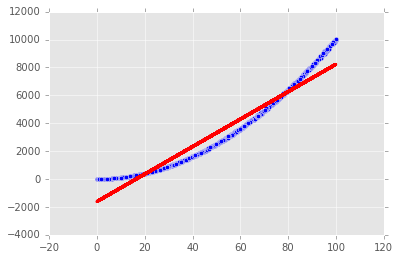

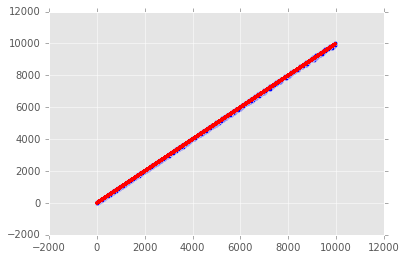

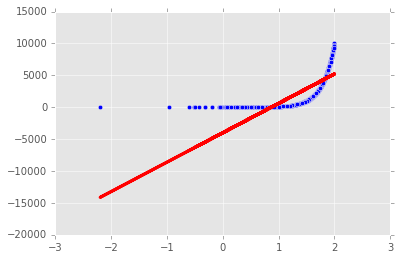

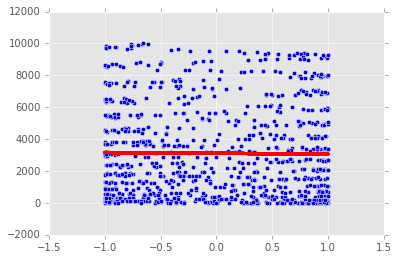

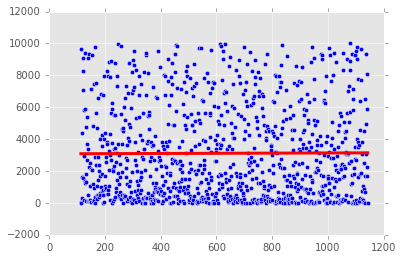

In [158]:
data=get_data("regLinPoli.csv")
#data=getData("regLinPoli.csv")
X_train, X_test, Y_train, Y_test= split_data(data)

Loading BokehJS ...

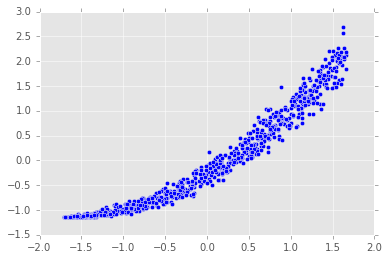

In [137]:
## Separamos los datos en entrenamiento y prueba
X_train, X_test, Y_train, Y_test = train_test_split(data[data.columns[0:-1]], data[data.columns[-1]], train_size=0.75)


ScaleX = preprocessing.StandardScaler()
ScaleY = preprocessing.StandardScaler()

ScaleX.fit(X_train)
X_train = pd.DataFrame(data = ScaleX.transform(X_train), columns= X_train.columns)

ScaleY.fit(Y_train)
Y_train = pd.Series(data = ScaleY.transform(Y_train), name = 'y' )

plt.scatter(X_train,Y_train)

## Convertimos el dataframe en vectores y matrices
X_train= np.array(X_train)
Y_train= np.array(Y_train)
X_test=np.array(X_test)
Y_test=np.array(Y_test)



from bokeh.io import output_notebook, show
from bokeh.plotting import figure
from bokeh.models import ColumnDataSource
output_notebook()

source = ColumnDataSource(data=data)
p = figure()
p.circle('X', 'y', size=3, source=source)
show(p)


In [166]:
from bokeh.io import output_notebook, show
from bokeh.plotting import figure
from bokeh.models import ColumnDataSource
output_notebook()

#source = ColumnDataSource(data=data)
source = ColumnDataSource(data={
    'x' : data[data.columns[4]],
    'y' : data[data.columns[-1]],
})

p = figure()
p.circle('x', 'y', size=1, source=source)
show(p)

Loading BokehJS ...

In [156]:
data.columns[-1]

'y'

## 1.- Obtención de datos y análisis exploratorio

In [ ]:
data = pd.read_csv("regLin4.csv")
data.describe()

## 2.- Preprocesamiento y separación de los datos

In [ ]:
## Separamos los datos en entrenamiento y prueba
X_train, X_test, Y_train, Y_test = train_test_split(data[["X"]],data["y"], train_size=0.75)

# Estandarizamos los datos de X, la y no importa pq sus valores están entre 0 y 1
ScaleX = preprocessing.StandardScaler()
ScaleX.fit(X_train)
X_train = pd.DataFrame(data = ScaleX.transform(X_train), columns = ['X'])

## Ploteamos los datos
plt.scatter(X_train,Y_train)

In [ ]:
##Iniciamos los vectores iniciales de w0 y w's'
w0_ini = rnd.random()
w_ini = [rnd.random()]

## Entreamos los pesos sin regularización
w0_fin, w_fin = entrena(w0_ini,w_ini,X_train,Y_train)

## Obtenemos lambda
lam= -w0_fin/w_fin[0]
print(lam)

In [ ]:
## Obtengo la nueva Y
Y_Predicted = []


for l in range(len(X_train)):
    suma = w0_fin + w_fin[0]*X_train.iloc[l,0]
    if suma > 0:
        res = 1
    else:
        res = 0
    Y_Predicted = Y_Predicted + [res] 


plt.scatter(X_train, Y_Predicted, color = "green", alpha = 0.07)
plt.vlines([lam],-.5,1.5,color="red")

# Entrene un Perceptrón para calcular la función “and” de dos variables

## Obtengo los datos, los divido y los preproceso

In [ ]:
p1 = pd.read_csv("and.csv")
X_train, X_test, Y_train, Y_test = train_test_split(p1[['x1','x2']],p1[['y']], train_size=0.75)

scaleX = preprocessing.StandardScaler()
scaleX.fit(X_train)
X_train=scaleX.transform(X_train)
X_test=scaleX.transform(X_test)

In [ ]:
w0i = rnd.random()
w1i = rnd.random()
w2i = rnd.random()
w = []
error_w3 = 0
y_esta3 = 0


def entrena(x,y,w0,w1,w2,eta):
    z = 0
    while (z<1000):
        z = z + 1
        for i in range(len(x)):
            if (w0 + w1*x[i][0]+w2*x[i][1] ) > 0:
                y_esta3 = 1
                error_w3 = y.values[i] - y_esta3
            else:
                y_esta3 = 0
                error_w3 = y.values[i] - y_esta3
            w0 = w0 + error_w3*eta
            w1= w1 + error_w3*eta*x[i][0]
            w2 = w2 + error_w3*eta*x[i][1]
    w.append(w0)
    w.append(w1)
    w.append(w2)

entrena(X_train,Y_train,w0i,w1i,w2i,0.8)

w0a = w[0]
w1a = w[1]
w2a = w[2]
error3 = []
error = []
y_estimada3 = []

def salida(k,z,w0,w1,w2):
    for r in range(len(k)):
        y_estn3 = w0 + w1*k[r][0] + w2*k[r][1]
        if y_estn3 > 0:
            y_estn3 = 1
        else:
            y_estn3 = 0
        error_a3 = z.values[r] - y_estn3
        error.append(error_a3)
        y_estimada3.append(y_estn3)

salida(X_test,Y_test,w0a,w1a,w2a)

print(w0a),
print(w1a),
print(w2a)

In [ ]:
plt.scatter(p1.x1,p1.x2)
x=np.linspace(-1.5,2.5,258)
plt.plot(x,-x*w1a/w2a-w0a/w2a,color='green')
plt.grid()

## Entrene un Perceptrón para calcular la función “or” de dos variables

In [ ]:
p2 = pd.read_csv("or.csv")
X_train, X_test, Y_train, Y_test = train_test_split(p2[['x1','x2']],p2[['y']], train_size=0.75)
#Si escalamos los datos
scaleX = preprocessing.StandardScaler()
scaleX.fit(X_train)
X_train=scaleX.transform(X_train)
X_test=scaleX.transform(X_test)

In [ ]:
w0i = rnd.random()
w1i = rnd.random()
w2i = rnd.random()
w = []
error_w3 = 0
y_esta3 = 0


def entrena(x,y,w0,w1,w2,eta):
    z = 0
    while (z<1000):
        z = z + 1
        for i in range(len(x)):
            if (w0 + w1*x[i][0]+w2*x[i][1] ) > 0:
                y_esta3 = 1
                error_w3 = y.values[i] - y_esta3
            else:
                y_esta3 = 0
                error_w3 = y.values[i] - y_esta3
            w0 = w0 + error_w3*eta
            w1= w1 + error_w3*eta*x[i][0]
            w2 = w2 + error_w3*eta*x[i][1]
    w.append(w0)
    w.append(w1)
    w.append(w2)

entrena(X_train,Y_train,w0i,w1i,w2i,0.5)

w0a = w[0]
w1a = w[1]
w2a = w[2]
error3 = []
y_estimada3 = []

def salida(k,z,w0,w1,w2):
    for r in range(len(k)):
        y_estn3 = w0 + w1*k[r][0] + w2*k[r][1]
        if y_estn3 > 0:
            y_estn3 = 1
        else:
            y_estn3 = 0
        error_a3 = z.values[r] - y_estn3
        error.append(error_a3)
        y_estimada3.append(y_estn3)

salida(X_test,Y_test,w0a,w1a,w2a)

print(w0a),
print(w1a),
print(w2a)

In [ ]:
plt.scatter(p2.x1,p2.x2)
x=np.linspace(-1.5,2.5,258)
plt.plot(x,-x*w1a/w2a-w0a/w2a,color='green')
plt.grid()